# What is regression? Why would you use it?

I'm interested in "predictive" models of brain responses. Suppose you do an experiment where you're recording some kind of brain responses, let's call them $y(t)$, while you provide your experimental subject with some kind of stimulus, let's call that $s(t)$. I think you can claim to understand something about what the brain is doing if you can build a model that predicts $y(t)$ from $s(t)$. (I think this claim is especially true if $s(t)$ is a "natural" stimulus, i.e. something that you would expect to see in everyday life, rather than something concocted specifically in a laboratory.)

How do we build a model that predicts $y(t)$ from $s(t)$? There are lots of approaches! But they all use one core concept: **_regression_**.

You do regression like this:
### 1. Extract features ###
You say "I can break $s(t)$ into different parts, or features". This transforms $s(t)$ into some other representation that we'll call $x(t)$. Let's say that the number of features in $x(t)$ is $p$.

### 2. Define the model ###
You say "I can predict $y(t)$ from a weighted combination of the features in $x(t)$". This means you are imagining a model that looks something like this,

$$y(t) = \sum_{i=1}^p x_i(t) \beta_i + \epsilon(t),$$
where:
* $x_i(t)$ refers to the $i$th feature in $x(t)$, 
* $\beta_i$ refers to the weight on that feature (we don't know what this weight is yet), and 
* $\epsilon(t)$ refers to the noise, i.e. any part of $y(t)$ that you can't predict from $x(t)$ (we don't know what this is yet either).

Since this model is just a weighted sum, we can write it more simply using a little linear algebra,
$$y(t) = x(t) \beta + \epsilon(t),$$
where $x(t)$ is now a $1 \times p$ vector of feature values and $\beta$ is a $p \times 1$ vector of weights.

### 3. Estimate the model weights, $\beta$ ###
You say "I need to find the weights $\beta$ that make my model good at predicting $y(t)$". Here's where the magic is! To do this we're first going to define a **_loss function_** $\mathcal{L}(\beta)$, which tells us how good our model is for any particular value of the weight vector $\beta$. (It's called a loss function because bigger values == bigger loss == a worse model. So we want the loss function to be as small as possible.)

The most common loss function (and best, in most situations) is **squared error loss**, which looks like this:
$$\mathcal{L}(\beta) = \sum_{t=1}^T (y(t) - x(t) \beta)^2 $$

Using this function you can now try to find the best values for $\beta$! Let's use some linear algebra to make that happen.

First, let's start by converting the sum in $\mathcal{L}(\beta)$ into a matrix multiplication. In order to do that, we need to stack the values of $y(t)$ and $x(t)$ into matrices. Let's define those matrices like this:
$$Y = \begin{bmatrix} y(t=1) \\ y(t=2) \\ \vdots \\ y(t=T) \end{bmatrix}, \;
X = \begin{bmatrix} x(t=1) \\ x(t=2) \\ \vdots \\ x(t=T) \end{bmatrix} $$

So we now have $Y$, which is a $T \times 1$ matrix of brain responses, and $X$, which is a $T \times p$ matrix of features that we extracted from the stimuli. We can use these matrices to rewrite the loss function $\mathcal{L}(\beta)$ as a matrix multiplication:
$$ \mathcal{L}(\beta) = (Y - X\beta)^\top (Y - X \beta) $$
(If it's not clear why this is equivalent to our first expression for the loss function, try to re-imagine this equation as a summation across timepoints.)

Then we can expand the multiplication:
$$ \mathcal{L}(\beta) = Y^\top Y - 2 Y^\top X \beta + \beta^\top X^\top X \beta $$

Now our goal here is to find the value of $\beta$ that minimizes the loss function. Think back to when you first learned calculus.. do you remember learning how to find the minimum of a function? In particular, our loss function is actually a parabola (why?), which means it has (approximately) one minimum! We can find this minimum by taking the derivative of the loss function with respect to $\beta$, and then finding the value of $\beta$ that sets the derivative to zero.

Taking the derivative gives us this expression:
$$\frac{d \mathcal{L}(\beta)}{d \beta} = -2 Y^\top X + 2 \beta^\top X^\top X $$
Here, the $Y^\top Y$ term disappeared because it didn't depend on $\beta$. If you want to know how the other terms came about, you might want to peruse the [somewhat baroque rules of matrix calculus](https://en.wikipedia.org/wiki/Matrix_calculus).

Now to find the best value of $\beta$ we need to set $\frac{d \mathcal{L}(\beta)}{d \beta} = 0$ and then solve for $\beta$:
$$\begin{eqnarray}
\frac{d \mathcal{L}(\beta)}{d \beta} &=& 0 \\
-2 Y^\top X + 2 \beta^\top X^\top X &=& 0 \\
\beta^\top X^\top X &=& Y^\top X \\
X^\top X \beta &=& X^\top Y \mbox{  (transposed both sides)} \\
\beta &=& (X^\top X)^{-1} X^\top Y
\end{eqnarray}$$

And there we have it! The best possible weights for predicting $y(t)$ from $x(t)$ are given by this neat little expression: $\beta = (X^\top X)^{-1} X^\top Y$.

Going forward, we're going to refer to this regression procedure as **_ordinary least squares_** or **_OLS_**, and the solution that we derived as "the OLS solution" or $\beta_{OLS}$.

# What is regularized regression? How does ridge regression work?

Remember above when we talked about the noise term, $\epsilon(t)$? We said it was any part of $y(t)$ that couldn't be predicted from $x(t)$. We can write this mathematically as the difference between $y(t)$ and the predicted value based on $x(t)$ and our estimated weights (this comes from re-arranging the equation listed under "Define the model" above):

$$\epsilon(t) = y(t) - x(t) \beta_{OLS}$$

Huh. When we write it this way, it looks a lot like the loss function $\mathcal{L}(\beta)$, doesn't it? In fact, the loss function is exactly the sum of the squared errors. This means our OLS regression model made the assumption that _$\epsilon(t)$ is as small as possible_, because we selected $\beta_{OLS}$ to minimize the size of the loss.

This all seems sensible in some situations. We don't know a priori which parts of $y(t)$ are signal (i.e. predictable from $x(t)$) and which parts are noise, so why not try to predict as much as possible? Well, it's time for 

<span style="color:red; font-family:Snell Roundhand, cursive; font-size: 24pt">**A CAUTIONARY TALE**</span>.

<span style="color:red; font-style:italic">
A young neuroscientist is performing an experiment.
</span>

<span style="color:red; font-style:italic">
"I just scanned a brain, and my scanning machine gave me big lists of numbers," they said, "I _know_ that the data from the scanning machine is always noisy, but I'm just going to try to fit a model that makes my total error small. What could be finer than finding small error?"
<span>

<span style="color:red; font-style:italic">
The young neuroscientist diligently fired up their Jupyter notebook and ran an ordinary least squares regression using the noisy data. At first, the result was amazing! The loss was almost exactly zero. This seemed like the breakthrough that the young neuroscientist had been waiting for.
</span>

<span style="color:red; font-style:italic">
But upon further reflection, the young neuroscientist realized that something was amiss. The result was not as good as it seemed to be. The young neuroscientist exclaimed, "What's this? Can it be? My regression weights make no sense! Some values are huge, some values are tiny, and if I use a different subset of data, the weights are completely different! Oh, woe is me! Why did I try to exactly minimize error?? _WHY?_"
</span>

I hope this sorry story has convinced you that perfectly minimizing error can cause problems. And the alternative viewpoint just seems like common sense: if you _know_ that your data are noisy, then it just doesn't make sense to make your noise term as small as possible--especially if "as small as possible" might mean that you could have _zero noise_.

_(Aside: under what situations would you expect the OLS loss to become exactly zero?)_

The solution to this problem is **regularization**, which is a family of techniques for adding extra constraints to regression models that balance against simply minimizing loss. The particular technique that we will discuss in detail today is called **ridge regression** or [**Tikhonov regularization**](https://en.wikipedia.org/wiki/Tikhonov_regularization).

### Intuition behind ridge regression
The problem with OLS regression is that it is _overconfident_ in its estimation of the weights $\beta_{OLS}$. While attempting to minimize loss, OLS will allow the weights to take on any values, even extreme and bizarre values that are incredibly unlikely to accurately reflect reality. Ridge regression solves this problem by forcing the values in $\beta$ to be small (i.e. close to zero).

This is roughly equivalent to assuming that the noise term, $\epsilon(t)$, is large (or, at least, larger than it would have otherwise been). You can see this by thinking about the equation for the noise term: $\epsilon(t) = y(t) - x(t) \beta$. We know that $\epsilon(t)$ really shouldn't be any bigger than $y(t)$--worst case we can set $\beta=0$ and then we get an exact equivalence. If weights $\beta_{OLS}$ exactly minimize the size of the noise term, then making the weights smaller will necessarily make the noise term bigger.

### Ridge regression
The simplest way to describe ridge regression mathematically is including a **penalty** on the size of the weights in the loss function. Specifically, ridge regression penalizes the sum of the squared weights, leading to a new and improved loss function that we'll call $\mathcal{L}_{ridge}(\beta)$:

$$ \mathcal{L}_{ridge}(\beta) = \sum_{t=1}^T (y(t) - x(t) \beta)^2 + \lambda \sum_{i=1}^p \beta_i^2 $$

or, in fancy linear algebra terms:

$$ \mathcal{L}_{ridge}(\beta) = (Y - X\beta)^\top (Y - X \beta) + \lambda \beta^\top \beta $$

The first term on the right hand side of this equation is the same squared error loss that we used before for OLS. The second term is the sum of the squares of all the weights in $\beta$, multiplied by a scalar variable $\lambda$ that we will call the **ridge coefficient**.

The ridge coefficient $\lambda$ determines the _strength_ of the regularization that's applied in ridge regression: 
* If you give $\lambda$ a large value, then the penalty term will be big relative to the loss, and the resulting weights will be very small. (In the limit of very large $\lambda$ you will force the weights to be almost exactly zero!) 
* If you give $\lambda$ a small value, then the penalty term will be small relative to the loss, and the resulting weights will not be too different from the OLS weights. (In the limit of $\lambda \rightarrow 0$, the penalty term will be zero and you'll get back exactly the OLS solution!)

To get the ridge regression weights, $\beta_{ridge}$, you minimize the ridge loss function. We don't need to go through the full derivation of the solution (though it's pretty fun, and easy to do based on the matrix calculus we did for the OLS solution!), so let's just take a look at the answer:

$$ \beta_{ridge} = (X^\top X + \lambda I)^{-1} X^\top Y $$

The only difference between this and the previous $\beta_{OLS}$ solution is that we added the factor $\lambda I$ (where $I$ is the identity matrix, the linear algebra equivalent of the number 1) inside the matrix inverse. Pretty simple!

### Ridge regression as a "Gaussian prior"

So we've introduced ridge regression as a "penalty" on the loss function, but there's another way to think about ridge regression that is pretty useful in some situations. I want to note that this second interpretation is _exactly mathematically equivalent_ to what you've already seen, it's just a different way of thinking about it.

Remember Bayes' rule? $P(a|b) = \frac{P(b|a) P(a)}{P(b)}$, right? It turns out we can use Bayes' rule to derive ridge regression if we plug in the right variables in the right places. To do this we kind of have to go back to the beginning, but I think it's a much quicker trip once you've already gotten to this point once.

From a Bayesian viewpoint, the goal of regression is to find the most probably set of weights ($\beta$) given the observed data ($x(t), y(t)$). Mathematically, that means we're trying to find the set of weights $\beta$ that maximize $P(\beta | x(t), y(t))$ (read as "probability of $\beta$ given $x(t)$ and $y(t)$").

We don't really know what $P(\beta | x(t),y(t))$ is—that's not how we defined our regression model—but we DO know what $P(y(t) | x(t), \beta)$ is! The assumptions that we've been working with so far (squared error loss, etc.), imply that $P(y(t) | x(t), \beta)$ is actually a Gaussian distribution (aka Normal distribution). The mean of this distribution is (we assume) $x(t) \beta$, and it has some variance that we don't know ahead of time (this is the size of the noise term $\epsilon(t)$). We can write that like this:

$$ P(y(t) | x(t), \beta) = \mathcal{N}(x(t) \beta, \sigma^2), $$
where:
* $\mathcal{N}(x(t) \beta, \sigma^2)$ denotes a Normal distribution with mean $x(t) \beta$ and variance $\sigma^2$.
* $\sigma^2$ is the size of the noise. We don't know what this is yet!

Ok now we kind of know what $P(y(t) | x(t), \beta)$ is, and we know Bayes' rule. We can combine these things to figure out $P(\beta | y(t), x(t))$, which is the thing we actually want to maximize! Let's see how that goes..

$$ P(\beta | y(t), x(t)) = \frac{P(y(t) | x(t), \beta) P(\beta)}{P(y(t))} $$

Huh ok. Bayes' rule says that in order to get the thing we want ($P(\beta | y(t), x(t))$), we take the thing we know ($P(y(t) | x(t), \beta)$), multiply it by some weird new thing ($P(\beta)$), and then divide it by some other weird new thing ($P(y(t)$). Let's step through these different terms, what they mean, and how we can handle them:
* $P(y(t) | x(t), \beta)$. This is the thing we already know. It's sometimes called the "likelihood" function. We're modeling it as a Gaussian distribution. All good!
* $P(\beta)$. This is a new one. It's called the "prior" distribution on $\beta$. Think of it as "given absolutely no information about any of the data, what values of $\beta$ do we think are more or less likely?" (Foreshadowing: _this is where the magic will happen._)
* $P(y(t))$. This is also a new one. Fortunately, we can ignore it entirely! It doesn't matter one bit what the value of this function is, because it's independent of $\beta$, so our choice of the best $\beta$ is unaffected by it! Whew.

So clearly the most important new thing here is the prior, $P(\beta)$. **Let's suppose that $P(\beta)$ is another Gaussian distribution.** That is, let's say that $P(\beta) = \mathcal{N}(0, \lambda^{-1} I)$, a multivariate Gaussian distribution (because $\beta$ typically is a vector containing more than one value) with mean zero and covariance $\lambda^{-1} I$. You may have an inkling of where this is heading now..

Let's go back to our full expression for $P(\beta | y(t), x(t))$ (which is called the posterior distribution on $\beta$), plug some things in, and see what happens!

$$\begin{eqnarray}
P(\beta | y(t), x(t)) & = & \frac{P(y(t) | x(t), \beta) P(\beta)}{P(y(t))} \\
P(\beta | y(t), x(t)) & \propto & P(y(t) | x(t), \beta) P(\beta) \;\mbox{ (dropping the denominator)}\\
P(\beta | y(t), x(t)) & \propto & e^{-\frac{1}{2 \sigma^2} (y(t) - x(t)\beta)^2} e^{-\frac{1}{2} \beta^\top (\lambda^{-1} I)^{-1} \beta} \; \mbox{ (plugging in the definition of a Gaussian distribution)} \\
P(\beta | y(t), x(t)) & \propto & e^{-\frac{1}{2 \sigma^2} (y(t) - x(t)\beta)^2 -\frac{1}{2} \beta^\top (\lambda^{-1} I)^{-1} \beta} \;\mbox{ (combining exponentials)}\\
P(\beta | y(t), x(t)) & \propto & e^{-\frac{1}{2 \sigma^2} (y(t) - x(t)\beta)^2 -\frac{1}{2} \lambda \beta^\top \beta}\\
\end{eqnarray}$$

Alright that was a wild ride, but we ended up with something pretty interesting. The most important thing here is to look at the exponent in our new expression.. does it look familiar? It should, because it's pretty much the same as the ridge loss function (or, at least, the negative of the ridge loss function)! Recall that our goal here is to maximize the probability of $\beta$ given $y(t)$ and $x(t)$. This equation shows us that maximizing that probability is _exactly equivalent_ to minimizing the ridge loss function. The prior $P(\beta)$ and the penalty term in the loss function $\lambda \beta^\top \beta$ _mean exactly the same thing_!

# How does changing the features before regression affect the result?

Now that you've learned about what ridge regression is, and (more or less) how it works, we can play around with it a bit and see what neat things we can make happen.

Let's start with something simple. Let's modify our $x(t)$ by dividing the value of the first feature by 10. (Why? Don't worry about that yet. Just see where this goes.) This means we are replacing our original $x(t)$ by something new, we'll call it $x'(t)$, and define it like this (remember that $x(t)$ is a vector that contains $p$ different features):

$$x'(t) = \begin{bmatrix} \frac{x_1(t)}{10} & x_2(t) & \dots & x_p(t) \end{bmatrix} $$

What would the result of this change be for OLS regression?

More specifically: if we did OLS regression with the responses $y(t)$ and modified stimulus features $x'(t)$, we'd obtain a new set of weights $\beta'_{OLS}$. What do you think the relationship is between $\beta'_{OLS}$ and $\beta_{OLS}$, the weights we would've gotten with the original $x(t)$? Let's find out!

Ok! What you should've found (spoiler alert) is that, when you're using OLS, making one of the features smaller by a factor of 10 just makes the corresponding weight value _bigger_ by a factor of 10. This makes the predictions of this new model _exactly the same_ as the predictions of the old model:

$$ x'(t)\beta' = x(t) \beta $$

Which.. makes sense, right? If you're finding the $\beta$ (well, $\beta'$, in this case) that minimizes the error perfectly, then your regression method shouldn't really care about silly little things like multiplying one of your features by 10.

So what about ridge? If we did ridge regression with $y(t)$ and $x'(t)$, obtaining new weights $\beta'_{ridge}$, how would those weights be related to the weights $\beta_{ridge}$ that you'd get from using the original $x(t)$?

Alright the result here is different. Not only does the weight on the first feature not increase by a factor of 10, the weights on the other features have changed as well. Unlike the OLS case, this model is _not_ equivalent to the original ridge model! What's going on here?

When we tested OLS, the regression procedure was able to correct for our modification by changing the weights. In particular, it made the weight on the feature that we modified 10x bigger. But in ridge regression, it's _costly_ to make the weights big. Remember that we penalize the loss by a factor of $\beta^2$. So in order to make the weight 10x bigger, the penalty (at least for that one parameter) needs to increase by _100x_.

The result is that the weight is _not_ simply increased by 10x, it's only increased by **XXx**. But there's more than that going on! The _other_ weights have also changed. Why did that happen? Setting the first weight to a smaller value than it should have been creates _new errors_ in the prediction of $y(t)$. To account for these errors, the model will change the values of the other weights in $\beta$ as well.

### _WHAT HAVE WE DONE?_

We just did an extremely simple thing: divided one of our feature values by 10. And it changed our entire model! How does this fit into any of the mathematical formalisms that we were dealing with earlier?

Let's redefine what we've done here more formally. This will help us discover what it is that we've managed to acomplish with this little stunt.

The only thing we did was divide one of the features by 10. Let's represent that as a matrix multiplication: $X A$. Remember that $X$ is a $T \times p$ matrix ($T$ rows, one for each "timepoint" in our dataset, and $p$ columns, one for each feature). Let's define $A$ as a $p \times p$ matrix that looks like this:

$$ A = \begin{bmatrix} 
0.1 & 0 & 0 & \dots \\ 
0 & 1 & 0 & \dots \\
0 & 0 & 1 & \dots \\
\vdots & \vdots & \vdots & \ddots
\end{bmatrix} $$

$A$ is a diagonal matrix (meaning it only has non-zero values on the main diagonal), and all of the values on the diagonal are 1 except the first, which we have set to 0.1 (i.e. dividing by 10). Multiplying this matrix on the right side of $X$ will do exactly what we did by hand before: scale the first feature down by a factor of 10.

So we can write the new model that we're trying to fit like this:

$$ Y = X A \beta + \epsilon $$

And we know that when we did this using OLS, we found that the first weight had _increased_ by a factor of 10. That's like multiplying $\beta$ by the inverse of $A$, giving you:

$$ \beta'_{OLS} = A^{-1} \beta_{OLS} $$

If we try to combine these two things and make predictions using this new scaled model, we see that everything cancels out nicely:

$$ X A \beta'_{OLS} = X A A^{-1} \beta_{OLS} = X \beta_{OLS} $$

Why did this work out so nicely? It's because the OLS equation for $\beta$:

$$ \beta_{OLS} = (X^\top X)^{-1} X^\top Y $$
becomes
$$ \beta'_{OLS} = (A^\top X^\top X A)^{-1} A^\top X^\top Y $$
where we can [pop the $A$ and $A^\top$ out of the inverse](https://en.wikipedia.org/wiki/Invertible_matrix#Other_properties), giving:
$$ \begin{eqnarray}
\beta'_{OLS} &=& A^{-1}(X^\top X)^{-1} (A^\top)^{-1} A^\top X^\top Y \\
&=& A^{-1}(X^\top X)^{-1} X^\top Y \\
&=& A^{-1}\beta_{OLS}\\
\end{eqnarray} $$
confirming what we found empirically! Nice.

### _WHAT HAVE WE DONE? (BUT FOR RIDGE)_

So what happened in the ridge case? Let's try to do the same trick with our ridge equation, $\beta_{ridge} = (X^\top X + \lambda I)^{-1} X^\top Y$:

$$ \beta'_{ridge} = (A^\top X^\top X A + \lambda I)^{-1} A^\top X^\top Y $$
We can't just pop the $A$ and $A^\top$ out of the inverse like we did before because there's a sum inside there.

But we can pop the outer $A^\top$ _into_ the inverse from the right side (its inverse ends up on the left side of each term), giving:

$$ \begin{eqnarray} \beta'_{ridge} &=& ((A^\top)^{-1} A^\top X^\top X A + \lambda (A^\top)^{-1})^{-1} X^\top Y \\
&=& (X^\top X A + \lambda (A^\top)^{-1})^{-1} X^\top Y \end{eqnarray}$$

Then we can use the old trick of multiplying by 1 (well, $I$) in the form of $A^{-1} A$, then pop the $A$ inside the inverse, giving:

$$\begin{eqnarray} \beta'_{ridge} &=& (A^{-1} A) (X^\top X A + \lambda (A^\top)^{-1})^{-1} X^\top Y \\
&=& A^{-1} (X^\top X A A^{-1} + \lambda (A^\top)^{-1} A^{-1})^{-1} X^\top Y \\
&=& A^{-1} (X^\top X + \lambda (A A^\top)^{-1})^{-1} X^\top Y 
\end{eqnarray} $$

Here we can see why the ridge solution came out just _different_. Similar to the OLS solution, it has this leading factor of $A^{-1}$, which is effectively multiplying the first weight by 10 here. But unlike the OLS solution, we still have this weird stuff sitting inside our big matrix inverse: the penalty factor is now $\lambda (A A^\top)^{-1}$ instead of just $\lambda I$. This is why all the other weights changed and not just the weight on the first feature.

To understand what this $(A A^\top)^{-1}$ factor is doing, let's go back to our Bayesian formulation, and in particular the prior on $\beta$. A [multivariate Gaussian distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) on $\beta$ with mean zero and covariance $\Sigma$ has the following form (I'm dropping the constant in front for convenience):
$$ P(\beta) \propto e^{-\frac{1}{2} \beta^{\top} \Sigma^{-1} \beta} $$

Originally we had set $\Sigma = \lambda^{-1} I$, making $\Sigma^{-1} = \lambda I$, which was the original factor in the ridge regression equation. Here, instead of $\lambda I$, we have $\lambda (A A^\top)^{-1}$. This suggests that we can interpret what we've done here—dividing the first feature in $X$ by 10—as _choosing a different prior for $\beta$_.

Specifically, we seem to have chosen $\Sigma = \lambda^{-1} A A^\top$. This prior says that each of the weights in $\beta$ has a prior variance of $\lambda^{-1}$ except the first, which has a prior variance of $\lambda^{-1} / 100$. Thus, the model is different because we pretty much told it that we expect the first weight to be much smaller than the others!

What we've rediscovered here, through this very simple manipulation, is an advanced regression technique called [Tikhonov regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization#Tikhonov_regularization).

## Implications for data preprocessing before regularized regression

One of the key things you might want to take away from this is that inconsequential-seeming things, like scaling features appropriately, can have huge effects on regression models.

# Formal definition of Tikhonov regression

When we introduced the Bayesian interpretation of ridge regression, we created a prior distribution on $\beta$ that, more or less, suggested to the regression model that the weights should be small. We defined this prior as a multivariate Gaussian distribution with mean zero and covariance matrix $\lambda^{-1} I$, i.e. equal variance (of $\lambda^{-1}$) on each weight with zero covariance between weights.

In Tikhonov regression we are simply generalizing this idea. Instead of assuming that the prior covariance is a scaled identity matrix, we can assume _any_ covariance matrix we want!

And what's more, as we've already seen, we can do Tikhonov regression using the standard ridge regression tools that are already available to us. Let's run through how to do that:

### Tikhonov regression via ridge regression

1. Suppose we know our responses $Y$ and stimulus features $X$. We want to fit a Tikhonov regression model of the form $Y = X\beta + \epsilon$, with the prior $P(\beta) = \mathcal{N}(0, \lambda^{-1} \Sigma)$, for some covariance $\Sigma$.
2. We use some technique (there are many) to take a matrix square root of $\Sigma$, giving $\sqrt{\Sigma} = A^\top$, so that $A A^\top = \Sigma$.
3. We are going to use this new matrix to transform our stimulus features, and then fit a ridge regression model for $Y = (XA)\beta' + \epsilon$.
4. The resulting ridge weights are $\beta' = A^{-1} (X^\top X + \lambda (A A^\top)^{-1})^{-1} X^\top Y$.
5. Finally, we multiply these weights by $A$ to get the Tikhonov weights (this corrects for the factor of $A^{-1}$, giving us weights that can be applied to the original $X$): $\beta = A \beta'$.

Let's try this process out!

# Word embeddings for Tikhonov regression models

Now let's get back to our fMRI experiment. We had subjects listen to stories and then we tried to predict the response of each voxel using a regression model where each word was a feature.

It turns out this didn't work terribly well using our OLS or ridge models. We also had this problem where some words might appear in our test set but not the training set, so we couldn't estimate weights for them at all.

Let's try to fix this model using Tikhonov regression! This will require one new concept: a **word embedding space**.

## Word embeddings

[Word embedding spaces](https://en.wikipedia.org/wiki/Word_embedding) are a tool for quantitatively modeling something related to the meaning of words. Famous examples of word embedding spaces are [word2vec](https://en.wikipedia.org/wiki/Word2vec) and [GloVe](https://en.wikipedia.org/wiki/GloVe_(machine_learning%29). The core idea of word embeddings is that they represent each word as a vector of numbers, where these vectors are specifically selected so that words with similar (or related) meanings have similar vectors.

For this exercise we're going to use a word embedding space of my own design called `english1000`. Let's load that space here and play with it a bit.

In [26]:
# Basic stuff we need
%config InlineBackend.figure_format = 'retina'

from matplotlib.pyplot import figure, cm
import matplotlib.pyplot as plt
import numpy as np
import logging
logging.basicConfig(level=logging.DEBUG)

In [19]:
# Load semantic model
# The SemanticModel class is something I wrote to make it easy to deal with word embedding spaces
from SemanticModel import SemanticModel
eng1000 = SemanticModel.load("data/small_english1000sm.hdf5")

DEBUG:SemanticModel:Loading file: data/small_english1000sm.hdf5
DEBUG:SemanticModel:Done loading file..


### Visualizing a word
First let's plot the length 985 vector for one word to see what it looks like.

Text(0,0.5,'Feature value')

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/huth/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/Users/huth/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


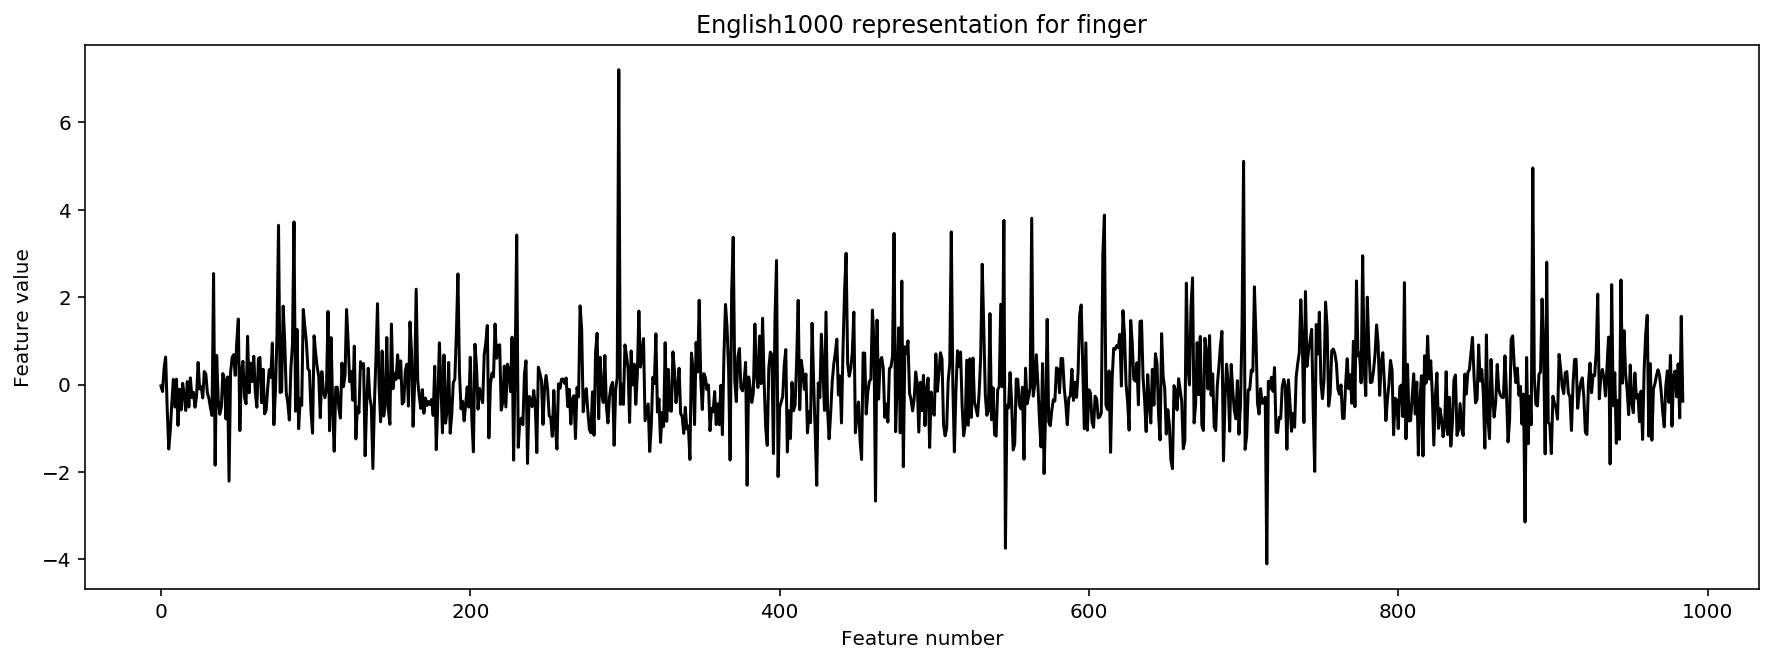

In [7]:
plot_word = "finger"

f = figure(figsize=(15,5))
ax = f.add_subplot(1,1,1)
ax.plot(eng1000[plot_word], 'k')
ax.axis("tight")
ax.set_title("English1000 representation for %s" % plot_word)
ax.set_xlabel("Feature number")
ax.set_ylabel("Feature value")

### Visualizing more than one word
Next let's plot the vectors for three words: "finger", "hand", and "language". Here you will see that "finger" (in black) and "hand" (in red) look pretty similar, but "language" (in blue) looks very different. Neat.

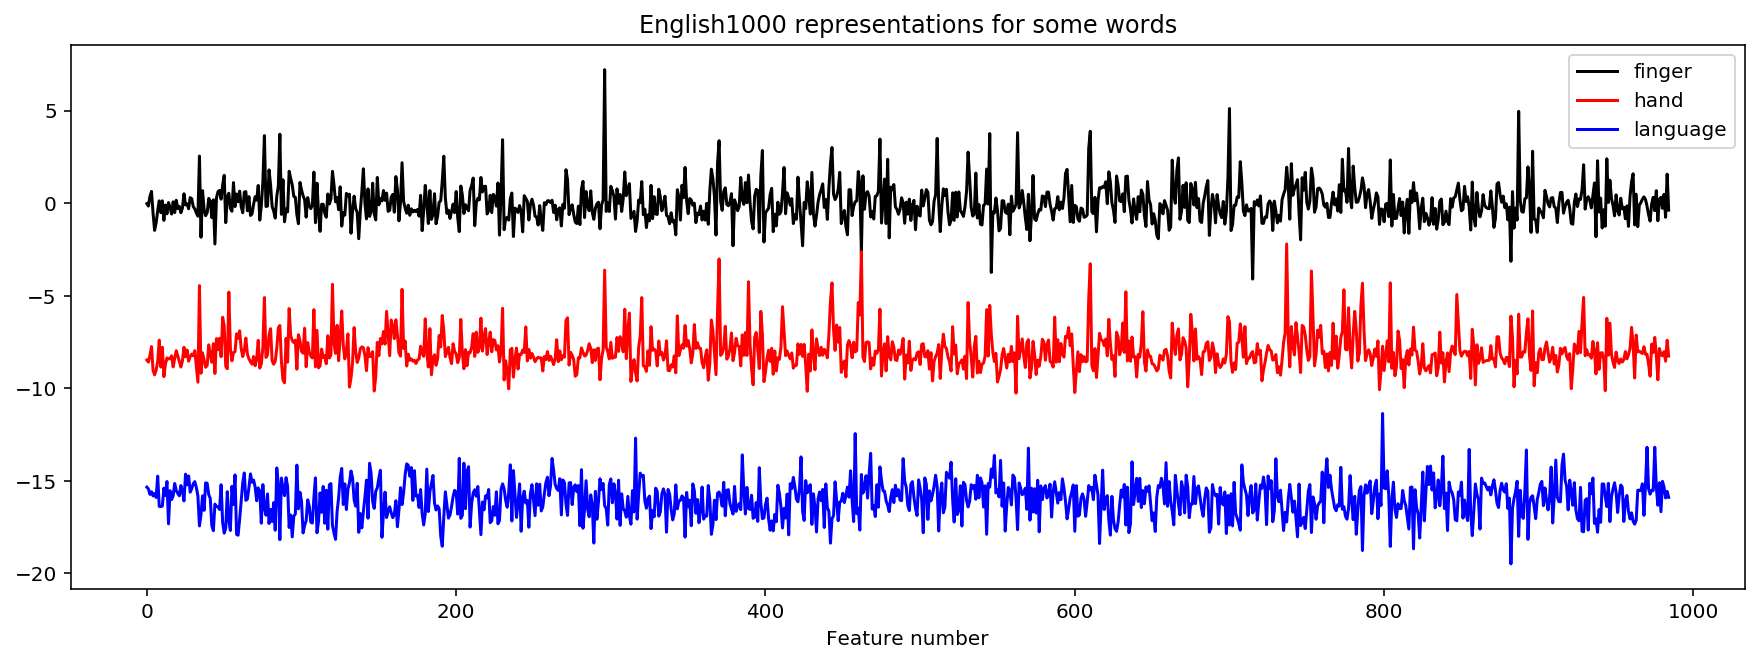

In [16]:
plot_words = ["finger", "hand", "language"]
colors = ["k", "r", "b"]

f = figure(figsize=(15,5))
ax = f.add_subplot(1,1,1)
wordlines = []

for ii, (word, color) in enumerate(zip(plot_words, colors)):
    wordlines.append(ax.plot(eng1000[word] - 8*ii, color)[0])

ax.axis("tight")
ax.set_title("English1000 representations for some words")
ax.set_xlabel("Feature number")
ax.legend(wordlines, plot_words)

### Semantic smoothness
One nice test of a vector-space semantic model is whether it results in a "semantically smooth" representation of the words. That is, do nearby words in the space have intuitively similar meanings? Here you can test that using the method `find_words_like_word`. 

Give any word (that the model knows about), and it will print out the 10 closest words (that it knows about) and their cosine similarities (or correlations, same thing in this case). This includes the word you supplied.

You can put different words in here and see what the model comes up with. 

*(Be warned: the model knows some dirty words. It was trained using the internet, after all.)*

In [17]:
# Test semantic model
eng1000.find_words_like_word("finger")

[(1.0, 'finger'),
 (0.6747595355473318, 'hand'),
 (0.6745201474550796, 'nose'),
 (0.6618110335849761, 'arm'),
 (0.6485988426371897, 'mouth'),
 (0.647702132621288, 'stick'),
 (0.623187282037763, 'hands'),
 (0.6119125817013201, 'pull'),
 (0.6049093174273824, 'lip'),
 (0.5998543434354034, 'ear')]

Here is just another example, but this one an abstract noun, "language". Again the model does a pretty good job at finding related words.

In [18]:
eng1000.find_words_like_word("language")

[(1.0, 'language'),
 (0.8560080667907977, 'languages'),
 (0.6156760397365071, 'subject'),
 (0.6061402250862803, 'writing'),
 (0.59623264279077, 'fundamental'),
 (0.5916411473276886, 'mathematics'),
 (0.5782287338780036, 'communication'),
 (0.5710664264275973, 'science'),
 (0.5683136448347497, 'theory'),
 (0.5631877809675399, 'terms')]

A little more generally, we can grab the vectors for a set of words and then look at how related each pair of vectors is.

(8, 985)


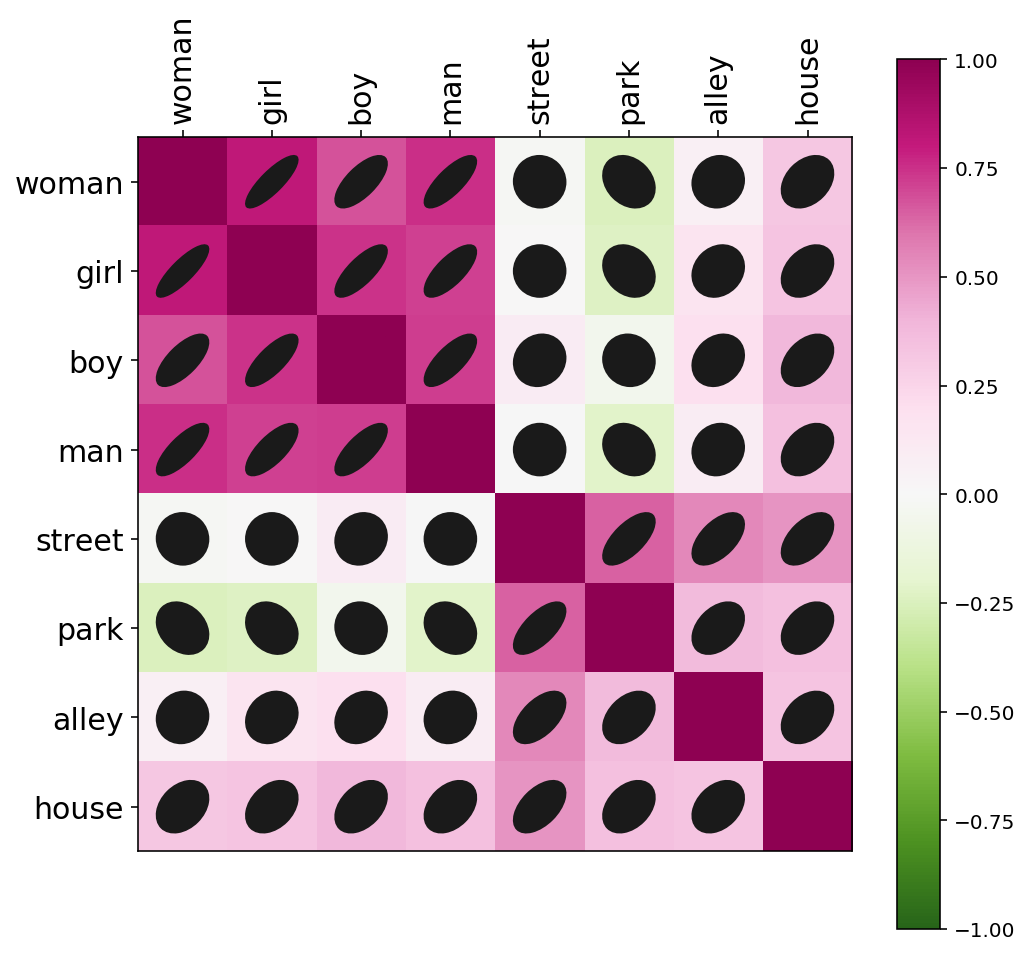

In [38]:
from covplot import covplot

sel_words = ['woman', 'girl', 'boy', 'man', 'street', 'park', 'alley', 'house']
sel_word_vectors = np.vstack([eng1000[w] for w in sel_words])
print(sel_word_vectors.shape)

sel_word_products = sel_word_vectors.dot(sel_word_vectors.T) / sel_word_vectors.shape[1]
covplot(sel_word_products)

plt.gca().xaxis.tick_top()
plt.xticks(range(len(sel_words)), sel_words, fontsize=15, rotation=90)
plt.yticks(range(len(sel_words)), sel_words, fontsize=15)
plt.colorbar();

## Using a word embedding space for Tikhonov regression

We're going to use these word embeddings to do Tikhonov regression for our fMRI experiment. Let's call the (number of embedding features $\times$ number of words) matrix of word embeddings $E$. We're going to choose the prior covariance for our regression weights to be proportional to $E^\top E$, i.e.

$$P(\beta) = \mathcal{N}(0, \lambda^{-1} E^\top E) $$

__This means that we expect (a priori) the regression weights on two words to be similar if those words have similar embedding vectors.__

For example, the words "woman" and "man" have very similar embedding vectors, according to the plot we created above. If we use the embedding vectors to create our Tikhonov prior, then we would be suggesting to our model that, if a voxel responds a lot to the word "woman", it probably also responds a lot to the word "man", and vice versa.

So how do we do this? We can partially follow the recipe from above, but we're actually going to have an easier time here than we would in the generic case since we don't need to take a matrix square root. We've already defined our prior covariance as $E^\top E$, so all we have to do is say $A = E^\top$. Let's give it a shot!